<a href="https://colab.research.google.com/github/keerthana-narra/global-terrorism/blob/main/N_Sai_Keerthana_Reddy_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [90]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Module 1/Capstone project/Copy of Global Terrorism Data.csv',encoding='latin1'
)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [91]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [92]:
#taking a subset because by looking at the data many columns have null values so not useful
global_terrorism = df[['eventid','iyear',	'imonth',	'iday', 'extended',	'country', 'country_txt',	'region',	'region_txt',	'provstate',	'city',	'latitude',	'longitude', 'success',	'suicide',	'attacktype1',	'attacktype1_txt', 'targtype1',	'targtype1_txt', 'targsubtype1',	'targsubtype1_txt', 'gname','weaptype1', 'weaptype1_txt',   'nkill',   'nwound',   'ishostkid', 'target1',  'ransom']]

In [93]:
global_terrorism.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,gname,weaptype1,weaptype1_txt,nkill,nwound,ishostkid,target1,ransom
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,MANO-D,13,Unknown,1.0,0.0,0.0,Julio Guzman,0.0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,13,Unknown,0.0,0.0,1.0,"Nadine Chaval, daughter",1.0
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Unknown,13,Unknown,1.0,0.0,0.0,Employee,0.0
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,Unknown,6,Explosives,NaN,NaN,0.0,U.S. Embassy,0.0
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,Unknown,8,Incendiary,NaN,NaN,0.0,U.S. Consulate,0.0


In [ ]:
#renaming the columns by the appropriate name
global_terrorism.rename(columns={'iyear' : 'year' , 'imonth' : 'month', 'iday' : 'day' , 'country_txt' : 'country_name' , 'region_txt' : 'region_name' ,  'attacktype1_txt' : 'attacktype' , 'target1' : 'target' , 'nkill' : 'killed' , 'nwound' : 'wounded'  , 'gname' : 'group' , 'targtype1_txt' : 'target_type' , 'weaptype1_txt' : 'weapon_type' , 'motive' : 'motive' } , inplace = True)
#Introducing new column
global_terrorism['casualities'] = global_terrorism.killed + global_terrorism.wounded
# taking data frame subset into global_terrorism variable
global_terrorism=global_terrorism[[ 'year' , 'month' , 'day' , 'country', 'country_name' ,'region','region_name' , 'city' , 'latitude' , 'longitude' ,  'attacktype' , 'killed' , 'wounded' , 'casualities' , 'target' , 'group' , 'target_type' , 'weapon_type' ]]

In [95]:
global_terrorism.head()

,year,month,day,country,country_name,region,region_name,city,latitude,longitude,attacktype,killed,wounded,casualities,target,group,target_type,weapon_type
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,130,Mexico,1,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,160,Philippines,5,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,78,Greece,8,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,101,Japan,4,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [108]:
terrorist_attacks_yearly = global_terrorism["year"].value_counts()
terrorist_attacks_yearly.sort_index(inplace=True) 
terrorist_attacks_yearly = pd.DataFrame(terrorist_attacks_yearly, columns = ['year'])
terrorist_attacks_yearly.head()

,year
1970,651
1971,471
1972,568
1973,473
1974,581


In [70]:
# total no.of attacks recorded
print('',global_terrorism.index.nunique())
# total no.of people got killed
print('',int(global_terrorism.killed.sum()))
# total no.of people wounded
print('',int(global_terrorism.wounded.sum()))

 181691
 411868
 523869


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


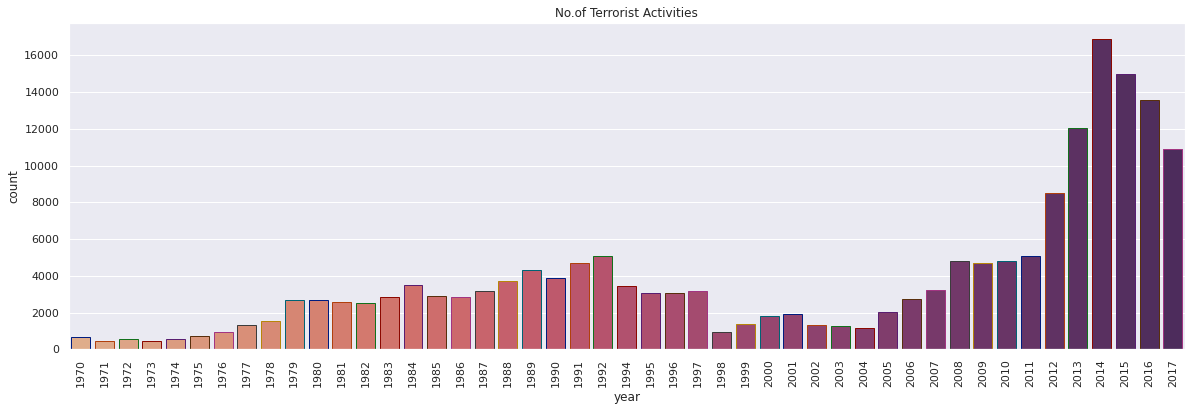

In [107]:
#Visualizing no.of terrorist activities happend from 1970-2017 (Year-wise)

plt.subplots(figsize=(20,6))   # for size of the rectangle the plot should appear length,breadth
sns.countplot('year',data=global_terrorism,palette='flare',edgecolor=sns.color_palette('dark')) 
plt.xticks(rotation=90) # rotates the year value
plt.title('No.of Terrorist Activities') # title
plt.show()


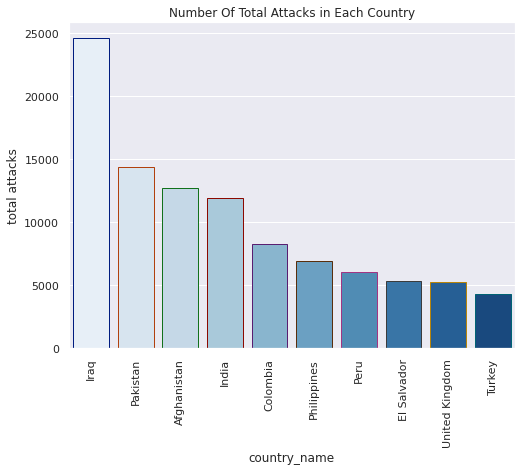

In [106]:
# Top 10 countries in total no.of attacks (Country-wise)
plt.subplots(figsize=(8,6))   # for size of the rectangle the plot should appear length,breadth
country_attacks = global_terrorism.country_name.value_counts()[:10].reset_index() # counting attacks and slicing upto first 10
country_attacks.columns = ['country_name', 'total attacks'] # names of x and y axis
sns.barplot(x=country_attacks.country_name, y=country_attacks['total attacks'], palette= 'Blues',edgecolor=sns.color_palette('dark'))
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks in Each Country')
plt.show()
